## Read in Data and NLTK Basics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [2]:
import nltk

In [13]:
# Read the data
df = pd.read_csv('Reviews.csv')

In [14]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [16]:
df['Text'].values[2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

In [17]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [18]:
print(df.shape)

(568454, 10)


In [19]:
df = df.head(1500)

In [20]:
print(df.shape)

(1500, 10)


## Quick EDA 

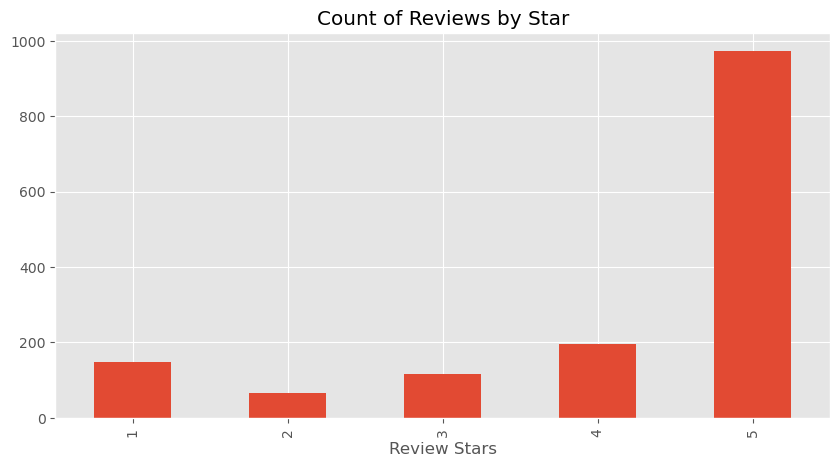

In [25]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Count of Reviews by Star',
                figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()

## Basic NTLK 

In [27]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [29]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [34]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## Step 1: VADER Sentiment Scoring 

In [ ]:
#1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of Words Approach
#2. Roberta Pretrained Model from Huggingface Pipeline

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [39]:
sia.polarity_scores('I am so Happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [40]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [41]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [42]:
# Run the polarity score on the entire dataset
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
1495,1496,B002JLT6QC,A1EVDWA956XRJW,"Krystal-Karma ""Blessings, Joy and Love""",1,1,4,1319760000,Prefer the whole slices,I absolutely LOVE the just tomatoes tomatoe sl...
1496,1497,B002JLT6QC,A1E7G56OX03JKO,Ranch Girl,1,1,5,1309996800,Nice to have in the pantry,"I toss some of these in soups, or hydrate in a..."
1497,1498,B002KGN4LE,AIUQ25LZLYSJR,David T. Johnson,23,23,5,1275955200,Detailed reply from company over infant feedin...,MY QUESTION FOLLOWED BY THEIR REPLY - VERY GOO...
1498,1499,B002KGN4LE,A1AQPNFHTL0ZQH,L. Juarez,9,9,5,1272931200,Colic/acid reflux babies...try this!,HANDS DOWN the best formula on the market. Sa...


In [44]:
#Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [50]:
vaders = pd.DataFrame(res).T
vaders =vaders.reset_index().rename(columns={'index':'Id'})
vaders =vaders.merge(df,how='left')

In [52]:
#Now we have sentiment score and metadata

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot VADER results 

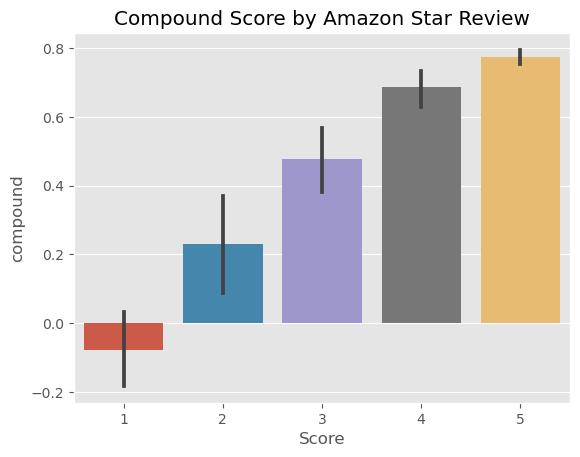

In [54]:
ax =sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

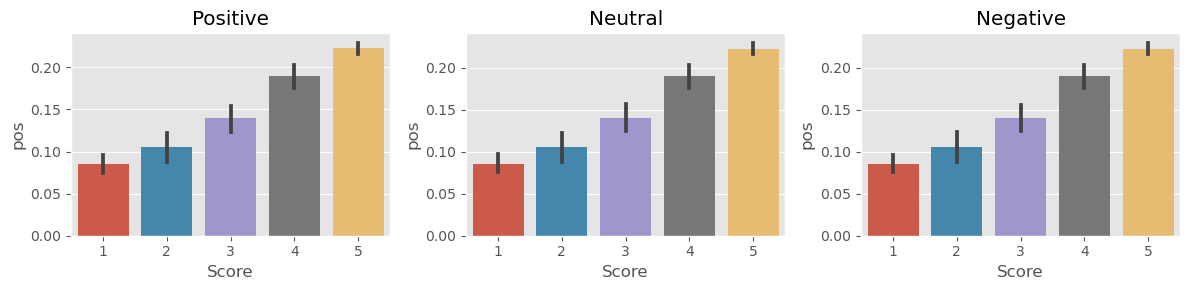

In [61]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show

## Step 2: Roberta Pretrained Model 

In [ ]:
#Transformer model accounts for the words but also the content related to other words

In [63]:
! pip install transformers

  Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
     ---------------------------------------- 0.0/263.9 kB ? eta -:--:--
     ---- -------------------------------- 30.7/263.9 kB 660.6 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/263.9 kB 326.8 kB/s eta 0:00:01
     --------------- -------------------- 112.6/263.9 kB 656.4 kB/s eta 0:00:01
     -------------------------- --------- 194.6/263.9 kB 784.3 kB/s eta 0:00:01
     --------------------------------- -- 245.8/263.9 kB 942.1 kB/s eta 0:00:01
     ------------------------------------ 263.9/263.9 kB 854.1 kB/s eta 0:00:00
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.5 MB 6.0 MB/s eta 0:00:01
     --- ------------------------------------ 0.3/3.5 MB 3.4 MB/s eta 0:00:01
     ------ --------------------------------- 0.6/3.5 MB 4.3 MB/s eta 0:00:01
     ------ -----

In [64]:
from transformers import AutoTokenizer

In [68]:
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [77]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [78]:
#VADER Results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [81]:
# Run for Roberta Model
encoded_text =tokenizer(example, return_tensors='pt')
output =model(**encoded_text)
scores=output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict ={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573692}


In [84]:
def polarity_scores_roberta(example):
    encoded_text =tokenizer(example, return_tensors='pt')
    output =model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict ={
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [104]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result= sia.polarity_scores(text)
        vader_result_rename ={}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"]= value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498


In [105]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')


In [106]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Compare Scores Between Models 

In [107]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

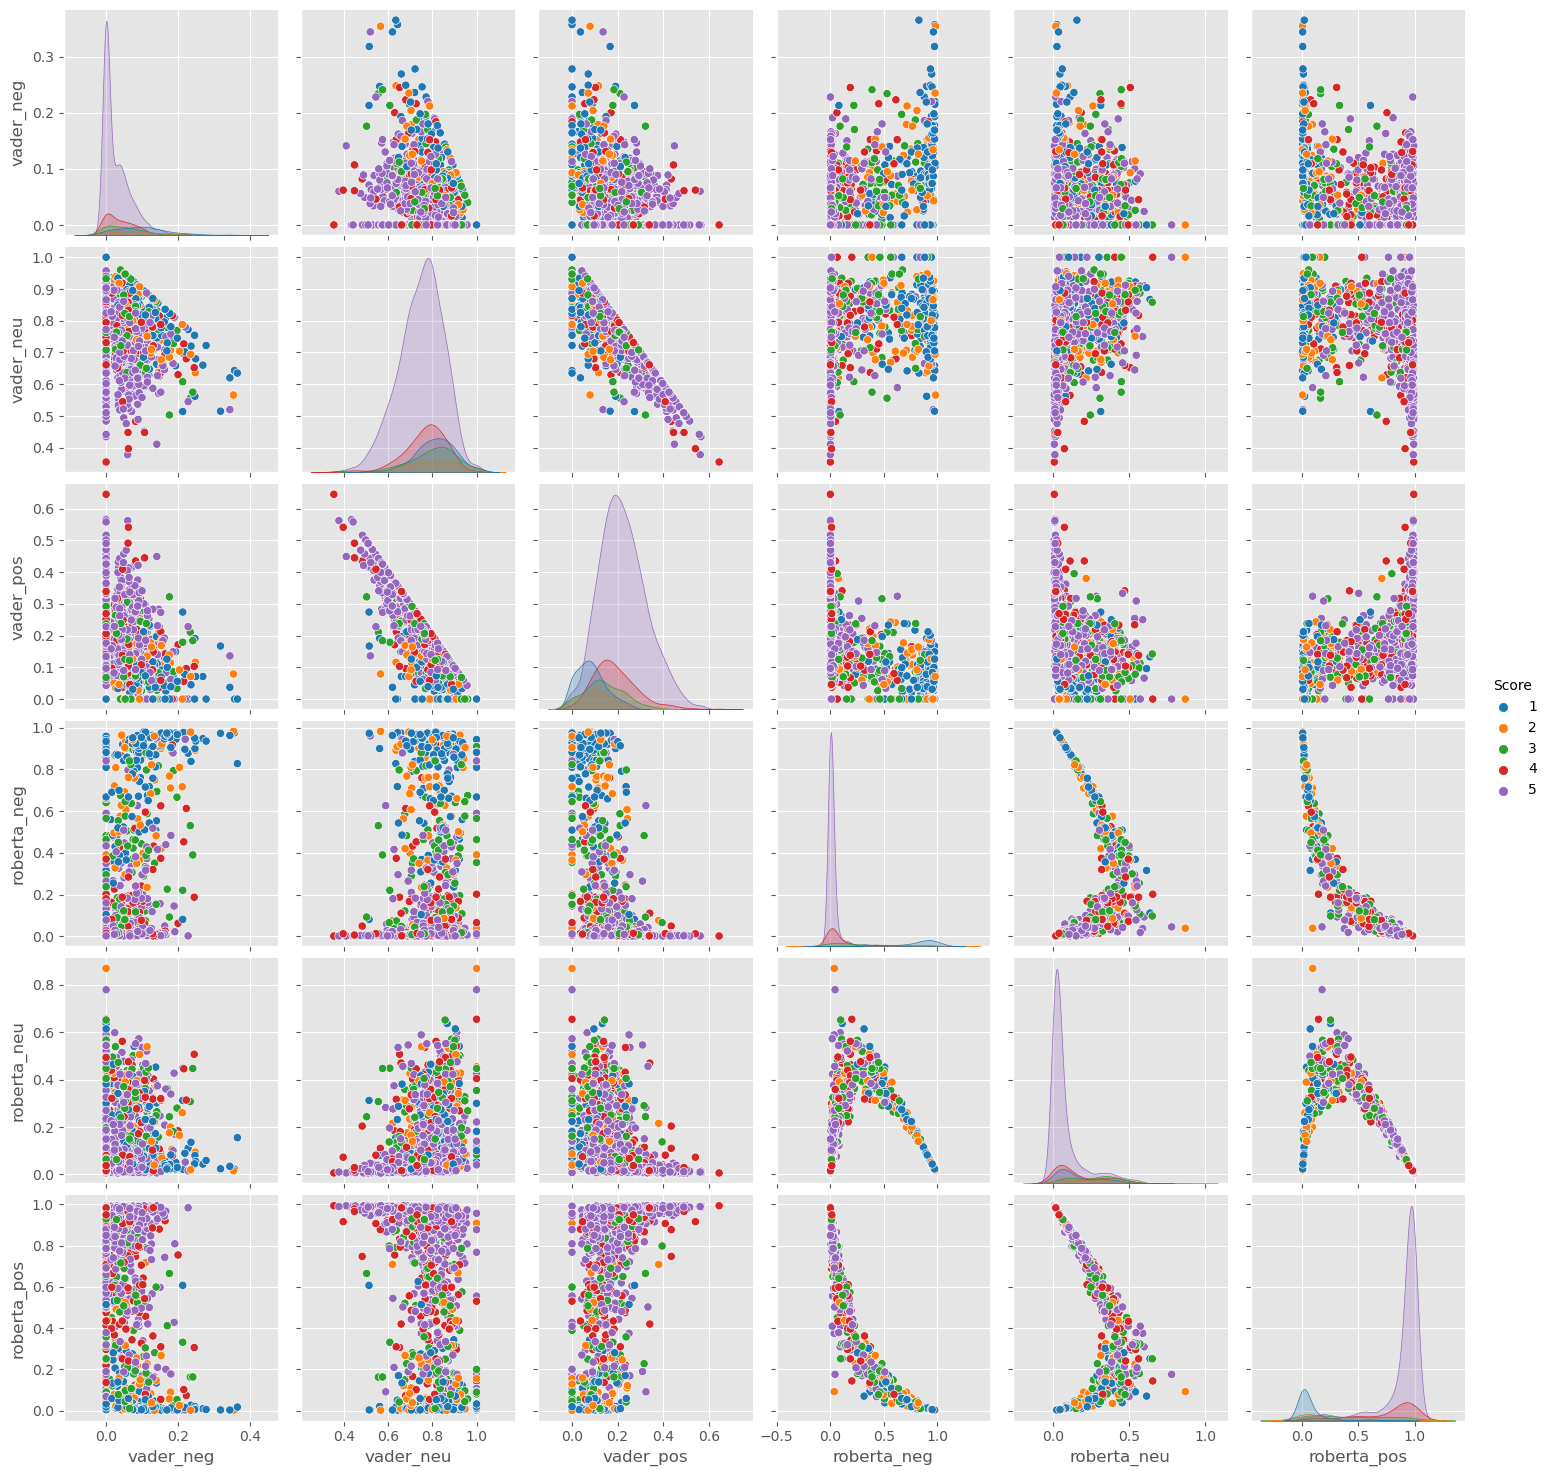

In [109]:
sns.pairplot(data=results_df, vars =['vader_neg', 'vader_neu', 'vader_pos',
                                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Step 4: Review Examples:

Positive 1-Star and Negative 5-Star Reviews
Lets look at some examples the model scoring and review score differ the most

In [112]:
results_df.query('Score ==1')\
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [113]:
results_df.query('Score ==1')\
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

### Negative Sentiment 5- Star Review 

In [ ]:
results_df.query('Score ==5')\
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [115]:
results_df.query('Score ==5')\
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"This is my son's favorite dinner! Best of all it seems it has the best combo of protein (21%) , vitamin A (100%) and C (30%). It is runnier than most of their dinners which was a great start for solids with protein in it. Love love love this brand and flavor. I think I purchased 50 jars so far."

## Extra: The Transfomers Pipeline

Quick and Easy way to run sentiment predictions

In [116]:
from transformers import pipeline

In [117]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [118]:
sent_pipeline('I would like to visit Paris')

[{'label': 'POSITIVE', 'score': 0.9990155696868896}]

In [119]:
!pip install xformers

     ---------------------------------------- 0.0/97.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/97.6 MB 1.3 MB/s eta 0:01:17
     ---------------------------------------- 0.0/97.6 MB 1.3 MB/s eta 0:01:17
     --------------------------------------- 0.1/97.6 MB 465.5 kB/s eta 0:03:30
     --------------------------------------- 0.1/97.6 MB 726.2 kB/s eta 0:02:15
     --------------------------------------- 0.2/97.6 MB 901.1 kB/s eta 0:01:49
     --------------------------------------- 0.3/97.6 MB 827.5 kB/s eta 0:01:58
     ---------------------------------------- 0.5/97.6 MB 1.4 MB/s eta 0:01:12
     ---------------------------------------- 0.6/97.6 MB 1.4 MB/s eta 0:01:09
     ---------------------------------------- 0.9/97.6 MB 1.8 MB/s eta 0:00:54
     ---------------------------------------- 0.9/97.6 MB 1.8 MB/s eta 0:00:54
     ---------------------------------------- 0.9/97.6 MB 1.8 MB/s eta 0:00:54
     ---------------------------------------- 0.9/97.6 

In [120]:
sent_pipeline('I dont get it')

[{'label': 'NEGATIVE', 'score': 0.9987433552742004}]